In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# Digression Example

## The problem setting



$f(x) = x_1 + x_2$,  $c(x) = x_1^2 + x_2^2 - 1$  
  
  
**Objective** 
  
$\min f(x)$ while $c(x) = 0$  
  
$$\mathcal{L}(x,y,\lambda)=f(x)-\lambda c(x)+\rho c(x)^2$$

## Digression Proof sketch
Suppose for every $\lambda$ there exists $x^*(\lambda)$

such that minimizes $$x^*(\lambda) = \arg \min_{x} \mathcal{L}(x, \lambda)$$

$$\frac{\partial \mathcal{L}(x^*(\lambda),\lambda)}{\partial x} = 0$$

$$\frac{d\mathcal{L}(x^*(\lambda), \lambda)}{d\lambda} = \frac{\partial \mathcal{L}}{\partial x}\frac{d x^*(\lambda)}{d \lambda}+ \frac{\partial \mathcal{L}}{\partial \lambda} =  \frac{\partial \mathcal{L}}{\partial \lambda}=-c(x)$$

$\lambda$ increases with **gradient ascent** to make $\frac{d \mathcal{L}(x^*(\lambda), \lambda)}{d \lambda}=-c(x)$ to be 0

## Known answer
When $x = y = -\frac{1}{\sqrt{2}}$, $x + y = -\sqrt{2}$ 

In [2]:
x = tf.get_variable("x", shape = [1], initializer = tf.constant_initializer(0.0))
y = tf.get_variable("y", shape = [1], initializer = tf.constant_initializer(0.0))
lamb = tf.get_variable("lambda", shape = [1], initializer = tf.constant_initializer(1.0))
rho = tf.constant([1],dtype= tf.float32, name = "rho")

In [3]:
f_x = x + y
c_x = tf.square(x)+tf.square(y)-1
Lagrange = f_x - lamb*(c_x) + rho*tf.square(c_x)

In [4]:
learning_rate = 0.01

In [5]:
train1 = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss = Lagrange, var_list = [x, y])
lamb_gradient = tf.gradients(ys = Lagrange, xs=lamb, grad_ys= learning_rate)

In [6]:
train2 = tf.assign(lamb, tf.reshape(lamb + lamb_gradient, [-1]))

In [7]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

## Pseudo code
> Repeat Until $C(x)$ becomes to $0$
>> $$\hat{x}, \hat{y} = \arg\min_{x,y} \mathcal{L}(x,y,\lambda)$$
>> $$\lambda \leftarrow \lambda + \frac{\partial \mathcal{L}(\hat{x}, \hat{y},\lambda)}{\partial \lambda}$$ 

In [8]:
f_x_tract = []
c_x_tract = []
lamb_tract = []

while True:
    prev = sess.run(Lagrange)
    while True:
        for i in range(10):
            sess.run(train1)
        curr = sess.run(Lagrange)
        if abs(curr - prev )<0.01: # Until Convergence
            break
        prev = curr
    sess.run(train2)
    f_x_tract.append(sess.run(f_x))
    c_x_tract.append(sess.run(c_x))
    lamb_tract.append(sess.run(lamb))
    if abs(sess.run(c_x))<0.001: # Until Convergence
        break

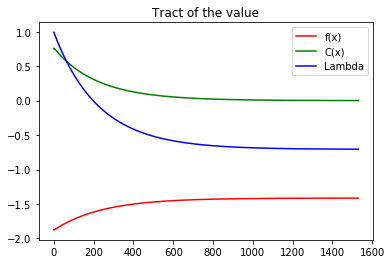

x : [-0.70745963], y : [-0.70745963]
f(x) : [-1.41491926] when c(x) : [ 0.00099826]


In [9]:
plt.plot(f_x_tract, 'r-', label = "f(x)")
plt.plot(c_x_tract, 'g-', label = "C(x)")
plt.plot(lamb_tract, 'b-',label = "Lambda")
plt.legend()
plt.title("Tract of the value")
plt.show()
print("x : {}, y : {}".format(sess.run(x), sess.run(y)))
print("f(x) : {} when c(x) : {}".format(sess.run(f_x), sess.run(c_x)))